Домашнее задание по 2 неделе.

# Задание 1


1. Получите выборку с помощью следующего вызова:
```
make_moons(n_samples=1000, noise=0.5, random_state=10)
```
2. Разбейте выборку на `train` и `test` с помощью функции `train_test_split`. Через аргументы функции зафиксируйте `random_state=10` и `test_size=0.5`.

3. Обучите класс `GridSearchCV` на обучающей выборке. Переберите параметр `n_neighbors` от 1 до 20. Чтобы получить детерменированный результат, передайте в параметр `cv` объект класса `KFold(n_splits=5, random_state=10)`. Этот класс будет отвечать за разбиение выборки во время кросс-валидации.

Напишите метрику качества (`accuracy`), которая получается, если применить обученный `GridSearchCV` к тестовой выбоке.

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.5, random_state=10)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=10)

In [4]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

In [5]:
grid_searcher = GridSearchCV( KNeighborsClassifier(),
                             param_grid={'n_neighbors': range(1, 21, 1),},
                             cv=KFold(n_splits=5, random_state=10, shuffle=True))

In [6]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy_score(y_test, grid_searcher.predict(X_test))

0.806

# Задание 2


Напишите функцию train_grid_search. Функция принимает выборку на вход. Она должна создать объект GridSearchCV, который переберет соседей от одного до 20. Обучите GridSearchCV. Функция должна возвращать значение ключа mean_test_score у атрибута cv_results_ в классе GridSearchCV. Это поле содержит информацию о значении метрики для каждого параметра.

Код ниже строит изображения средней зависимости качества от количества соседей. Выберите картинку, которая у вас получилась.


In [11]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from matplotlib import pyplot as plt

In [48]:
def train_grid_search(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={
                               'n_neighbors': range(1, 21, 1),
                               'weights': ['uniform']
                               },
                             cv=KFold(n_splits=5, random_state=10, shuffle=True),
                             
                             n_jobs=-1)
  grid_searcher.fit(X,y)
  return grid_searcher.cv_results_['mean_test_score']

In [49]:
mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_scores.append(train_grid_search(X, y))

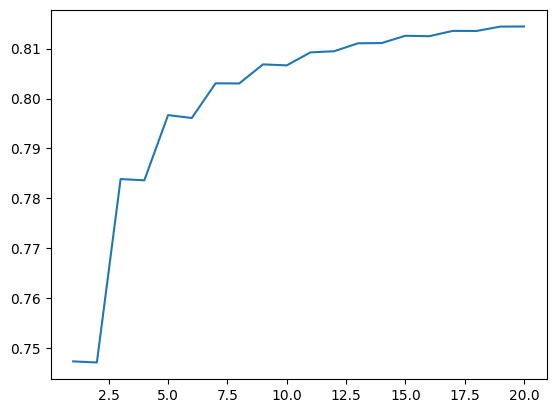

In [50]:
mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

In [51]:
def train_grid_search_2(X, y):
  grid_searcher = GridSearchCV(KNeighborsClassifier(),
                             param_grid={
                               'n_neighbors': range(1, 21, 1),
                               'weights': ['distance']
                               },
                             cv=KFold(n_splits=5, random_state=10, shuffle=True),
                             
                             n_jobs=-1)
  grid_searcher.fit(X,y)
  return grid_searcher.cv_results_['mean_test_score']

In [52]:
mean_test_scores = []
for i in range(1000):
  X, y = make_moons(n_samples=1000, noise=0.5)
  mean_test_scores.append(train_grid_search_2(X, y))

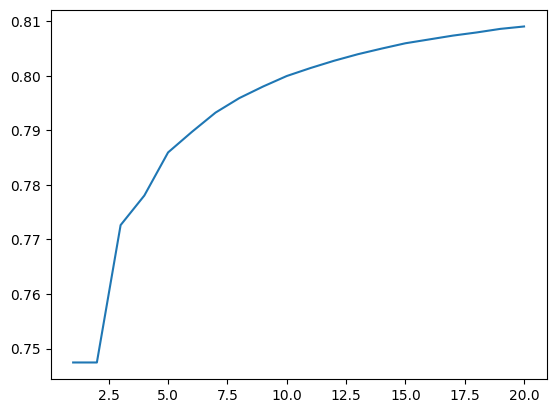

In [53]:
mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

# Задание 3

In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

images, labels = mnist.load_data()[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


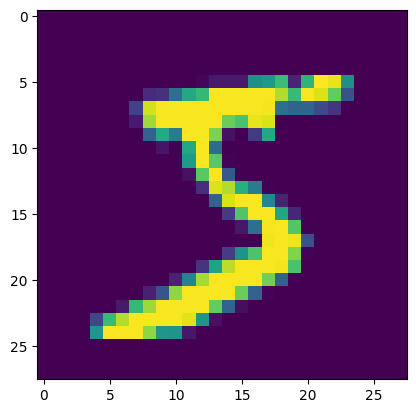

In [3]:
plt.imshow(images[0].reshape(28, 28))

В этом задании вы будете работать с классическим датасетом MNIST. Код выше загрузит данные в переменные images и labels. Обучите knn с 30 ближайшими соседями. Предварительно разбейте выборку на train и test в соотношении 80/20. Какой accuracy вы получаете на тестовой выборке?

In [4]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

# Задание 4 (неоцениваемое)

Найдите примеры, которые были классифицированы не правильно. Найдите и визуализируйте 5 соседей неправильных предсказаний у любого ошибочного примера. Найти соседей точки можно с помощью метода kneighbors.  Почему они были классифицированы неправильно?